In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import tree
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df["Marital.Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [7]:
lb=preprocessing.LabelEncoder()
for i in range(0,df.shape[1]):
    if df.dtypes[i]=="object":
        df[df.columns[i]]=lb.fit_transform(df[df.columns[i]])

In [8]:
df.sample(6)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
225,1,2,42488,125883,0,1
264,0,2,32900,118899,5,0
11,0,2,61063,94875,6,1
440,0,2,77312,170407,13,1
210,1,2,35200,125993,13,1
502,0,1,83814,53240,1,1


In [9]:
df["Tax_range"]=""
df.loc[(df["Taxable.Income"]>=0)&(df["Taxable.Income"]<=30000),"Tax_range"]="Risky"
df.loc[df["Taxable.Income"]>30000,"Tax_range"]="Good"

In [10]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_range
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [11]:
df.Tax_range.value_counts()

Good     476
Risky    124
Name: Tax_range, dtype: int64

(array([0, 1]), [Text(0, 0, 'Good'), Text(1, 0, 'Risky')])

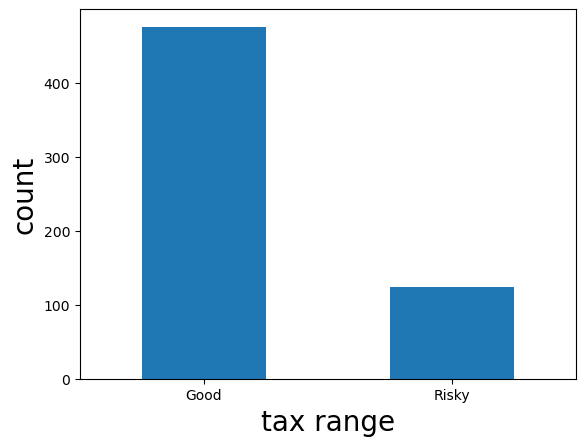

In [33]:
df.Tax_range.value_counts().plot(kind='bar')
plt.xlabel("tax range",size=20)
plt.ylabel("count",size=20)
plt.xticks(rotation=0)

In [12]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax_range'],
      dtype='object')

In [13]:
#new=df[['Undergrad', 'Marital.Status', 'City.Population','Work.Experience', 'Urban','Tax_range']]

In [14]:
#new.sample(5)

In [15]:
X=df.iloc[:,[0,1,3,4,5]]
y=df.iloc[:,-1]

# Build Decision Tree model using gini criteria 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=6)

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=5)

In [19]:
y_pred=model.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.7583333333333333

In [21]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

        Good       0.79      0.95      0.86        94
       Risky       0.29      0.08      0.12        26

    accuracy                           0.76       120
   macro avg       0.54      0.51      0.49       120
weighted avg       0.68      0.76      0.70       120



[Text(0.37316176470588236, 0.9285714285714286, 'City.Population <= 60294.5\ngini = 0.325\nsamples = 480\nvalue = [382, 98]\nclass = Good'),
 Text(0.16176470588235295, 0.7857142857142857, 'Undergrad <= 0.5\ngini = 0.251\nsamples = 102\nvalue = [87, 15]\nclass = Good'),
 Text(0.08823529411764706, 0.6428571428571429, 'Marital.Status <= 1.5\ngini = 0.137\nsamples = 54\nvalue = [50, 4]\nclass = Good'),
 Text(0.058823529411764705, 0.5, 'City.Population <= 34470.0\ngini = 0.198\nsamples = 36\nvalue = [32, 4]\nclass = Good'),
 Text(0.029411764705882353, 0.35714285714285715, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Good'),
 Text(0.08823529411764706, 0.35714285714285715, 'City.Population <= 36489.5\ngini = 0.269\nsamples = 25\nvalue = [21, 4]\nclass = Good'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Risk'),
 Text(0.11764705882352941, 0.21428571428571427, 'City.Population <= 52621.5\ngini = 0.165\nsamples = 22\nvalue = [20, 2]

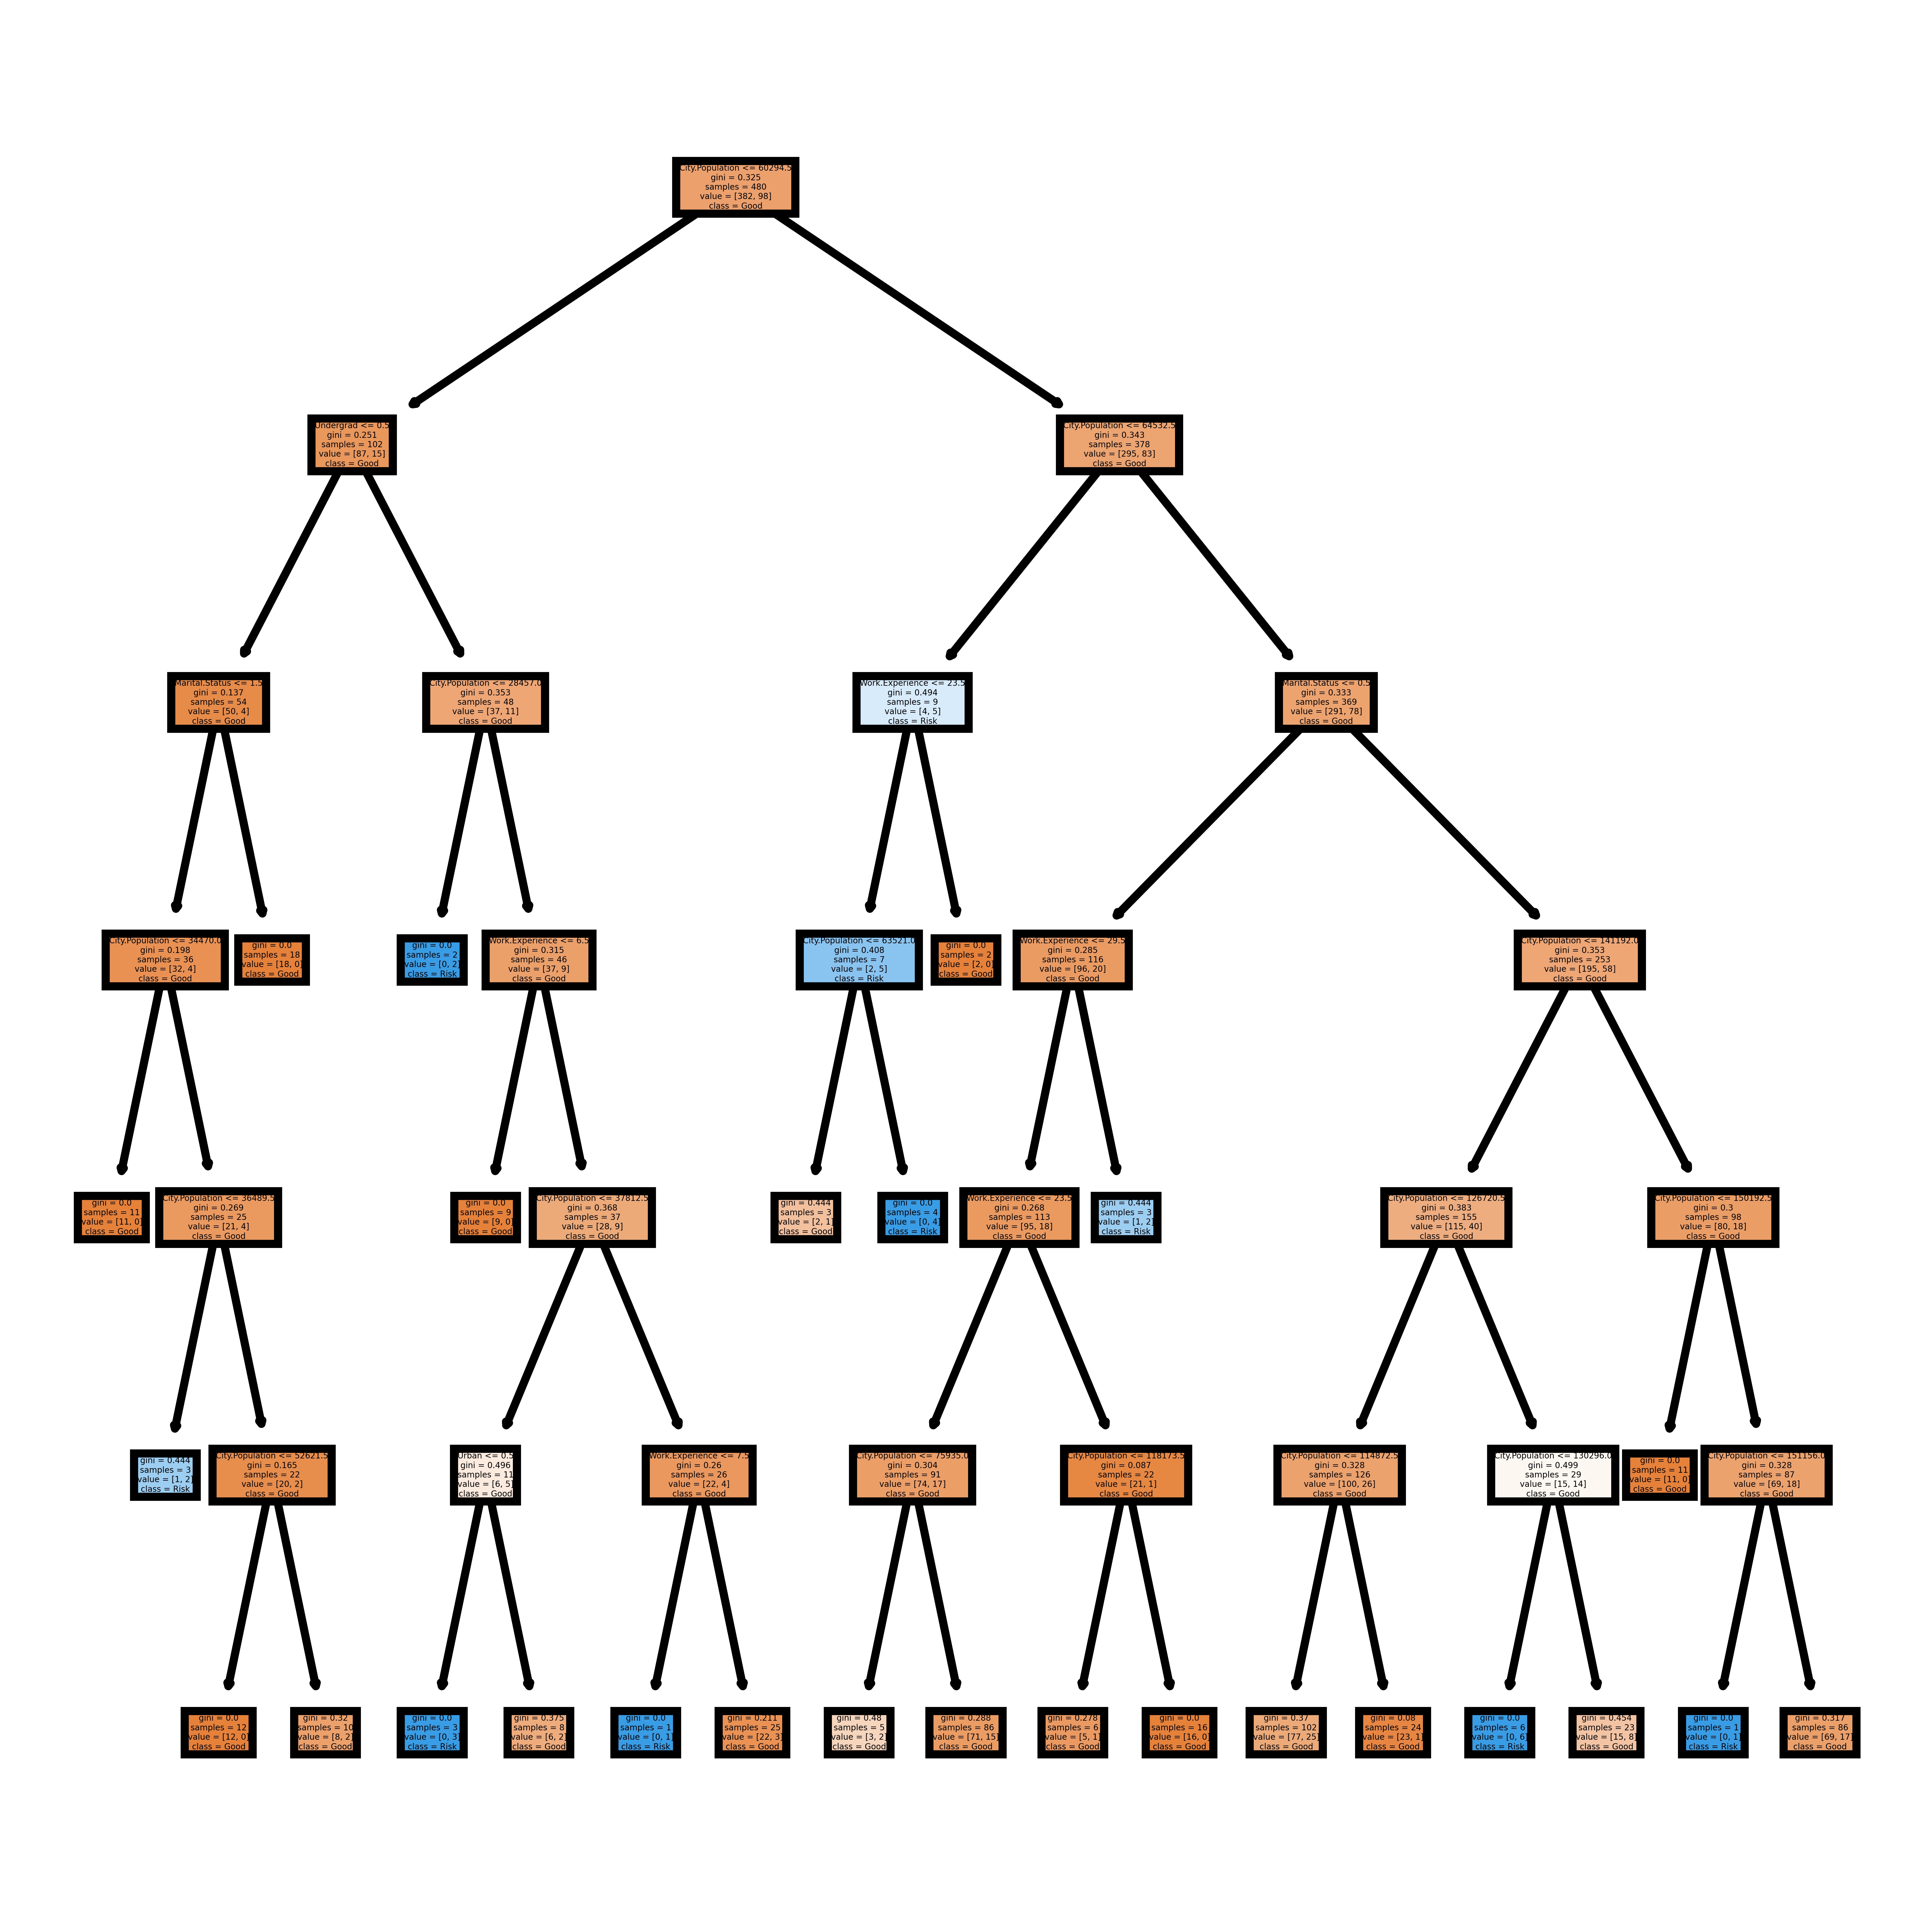

In [22]:
cn=["Good","Risk"]
fn=['Undergrad', 'Marital.Status', 'City.Population','Work.Experience', 'Urban']
plt.subplots(figsize = (4,4), dpi=2000)
tree.plot_tree(model,feature_names = fn, 
               class_names=cn,
               filled = True)

# Build Decision Tree model using entropy

In [23]:
model=DecisionTreeClassifier(criterion='entropy',min_samples_split=5)

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [25]:
y_pred=model.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [27]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

        Good       0.78      0.81      0.79        94
       Risky       0.18      0.15      0.17        26

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120

